In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r'/content/drive/MyDrive/Dataset/beer-servings.csv',index_col='Unnamed: 0')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
df.shape

(193, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [7]:
df.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [8]:
df.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

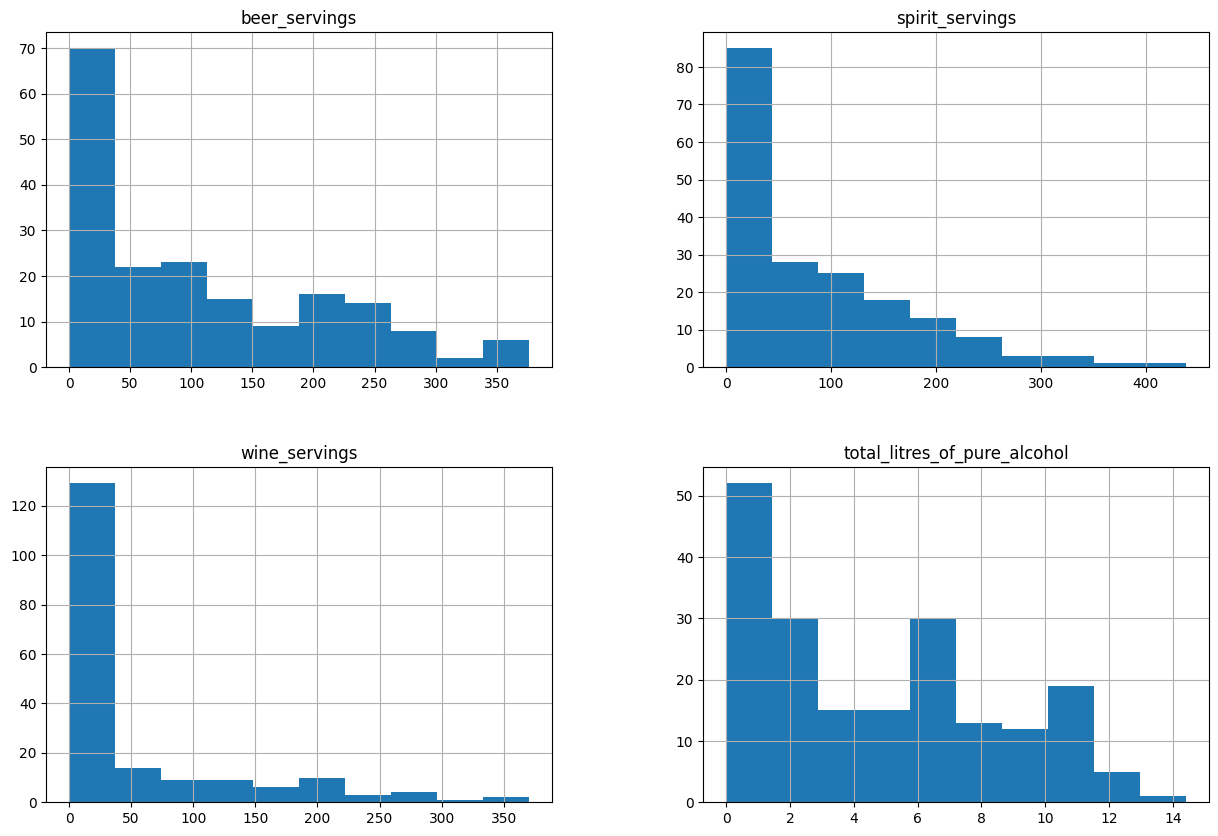

In [9]:
dgraph = df.select_dtypes(include = ['float'])
dgraph.hist(figsize=(15,10))
plt.show()

In [10]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [11]:
df['beer_servings']=df['beer_servings'].fillna(df['beer_servings'].median())
df.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [12]:
for i in ['spirit_servings','wine_servings',
          'total_litres_of_pure_alcohol']:
  df[i]=df[i].fillna(df[i].median())

In [13]:
df.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [14]:
df.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [15]:
df.country.nunique()

193

In [16]:
df.drop('country',axis=1,inplace=True)

In [17]:
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'Box plot of beer servings')

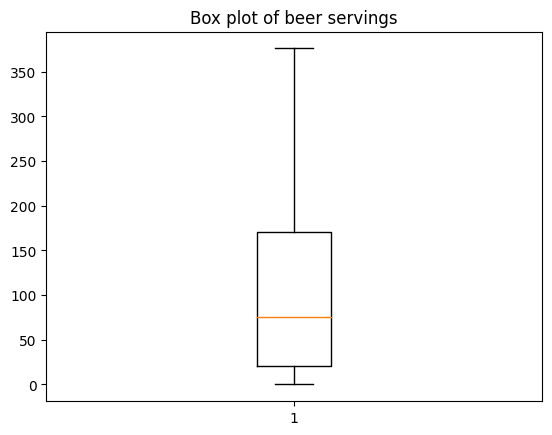

In [18]:
plt.boxplot(df['beer_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'Box plot of beer servings')

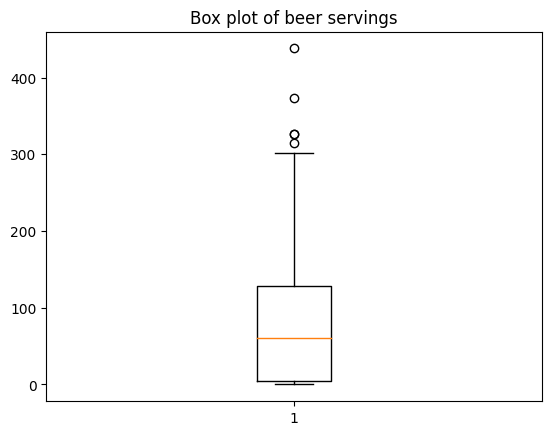

In [19]:
plt.boxplot(df['spirit_servings'])
plt.title('Box plot of beer servings')

In [20]:
q1=np.percentile(df['spirit_servings'],25,interpolation='midpoint')
q2=np.percentile(df['spirit_servings'],50,interpolation='midpoint')
q3=np.percentile(df['spirit_servings'],75,interpolation='midpoint')



print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


<ipython-input-20-57ef83b3da05>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(df['spirit_servings'],25,interpolation='midpoint')
<ipython-input-20-57ef83b3da05>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(df['spirit_servings'],50,interpolation='midpoint')
<ipython-input-20-57ef83b3da05>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.

In [21]:
df['spirit_servings'].median()

60.0

In [22]:
iqr= q3-q1

low_limit=q1-1.5*iqr
up_limit =q3+1.5*iqr

print(low_limit)
print(up_limit)

-179.5
312.5


In [23]:
outlier =[]
for x in df ['spirit_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [24]:
ind1 = df['spirit_servings']>up_limit
df.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [25]:
df.drop([15,68,73,141,144],inplace =True)

Text(0.5, 1.0, 'Box plot of beer servings')

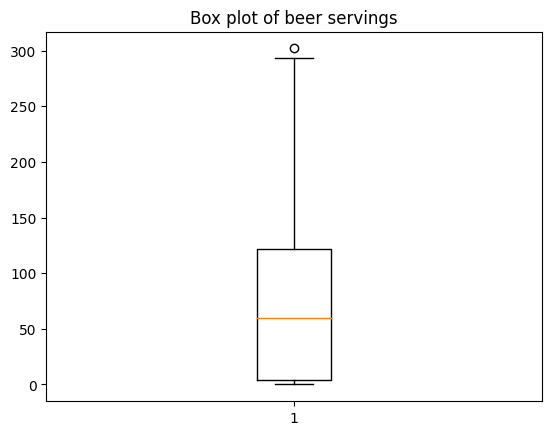

In [26]:
plt.boxplot(df['spirit_servings'])
plt.title('Box plot of beer servings')

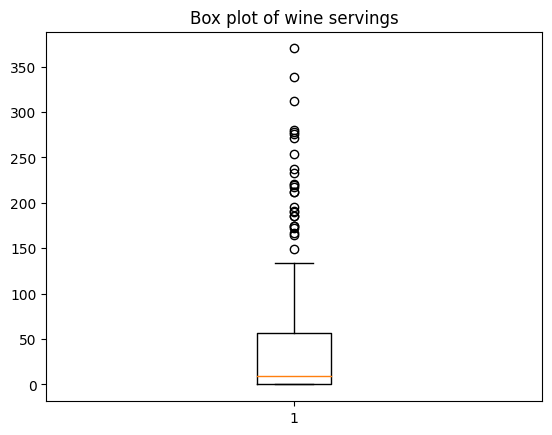

In [27]:
plt.boxplot(df['wine_servings'])
plt.title('Box plot of wine servings')
plt.show()

In [28]:
q1=np.percentile(df['wine_servings'],25,interpolation='midpoint')
q2=np.percentile(df['wine_servings'],50,interpolation='midpoint')
q3=np.percentile(df['wine_servings'],75,interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit  = q3+1.5*iqr
print(low_limit)
print(up_limit)

-83.75
142.25


<ipython-input-28-8c2be6894d35>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(df['wine_servings'],25,interpolation='midpoint')
<ipython-input-28-8c2be6894d35>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(df['wine_servings'],50,interpolation='midpoint')
<ipython-input-28-8c2be6894d35>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.perc

In [29]:
outlier = []
for x in df['wine_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

In [30]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [31]:
ind1 = df['wine_servings']>up_limit
df.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [32]:
df.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185], inplace = True)

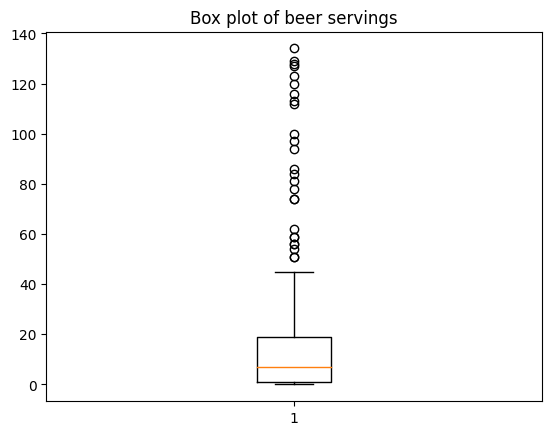

In [33]:
plt.boxplot(df['wine_servings'])
plt.title('Box plot of beer servings')
plt.show()

Text(0.5, 1.0, 'Box plot of total_liters_of_pure_alcohol')

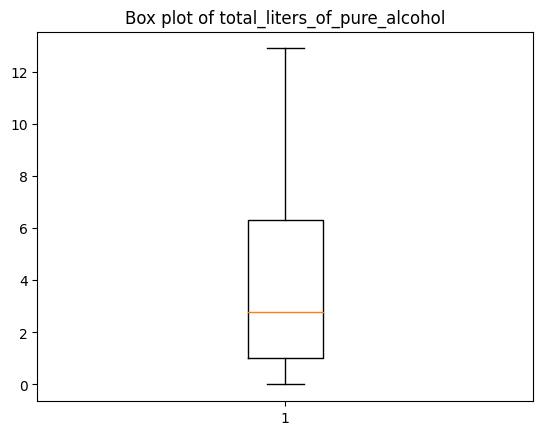

In [34]:
plt.boxplot(df['total_litres_of_pure_alcohol'])
plt.title('Box plot of total_liters_of_pure_alcohol')

In [35]:
df.shape

(162, 5)

In [36]:
df.continent.nunique()

6

In [37]:
data = pd.get_dummies(df)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


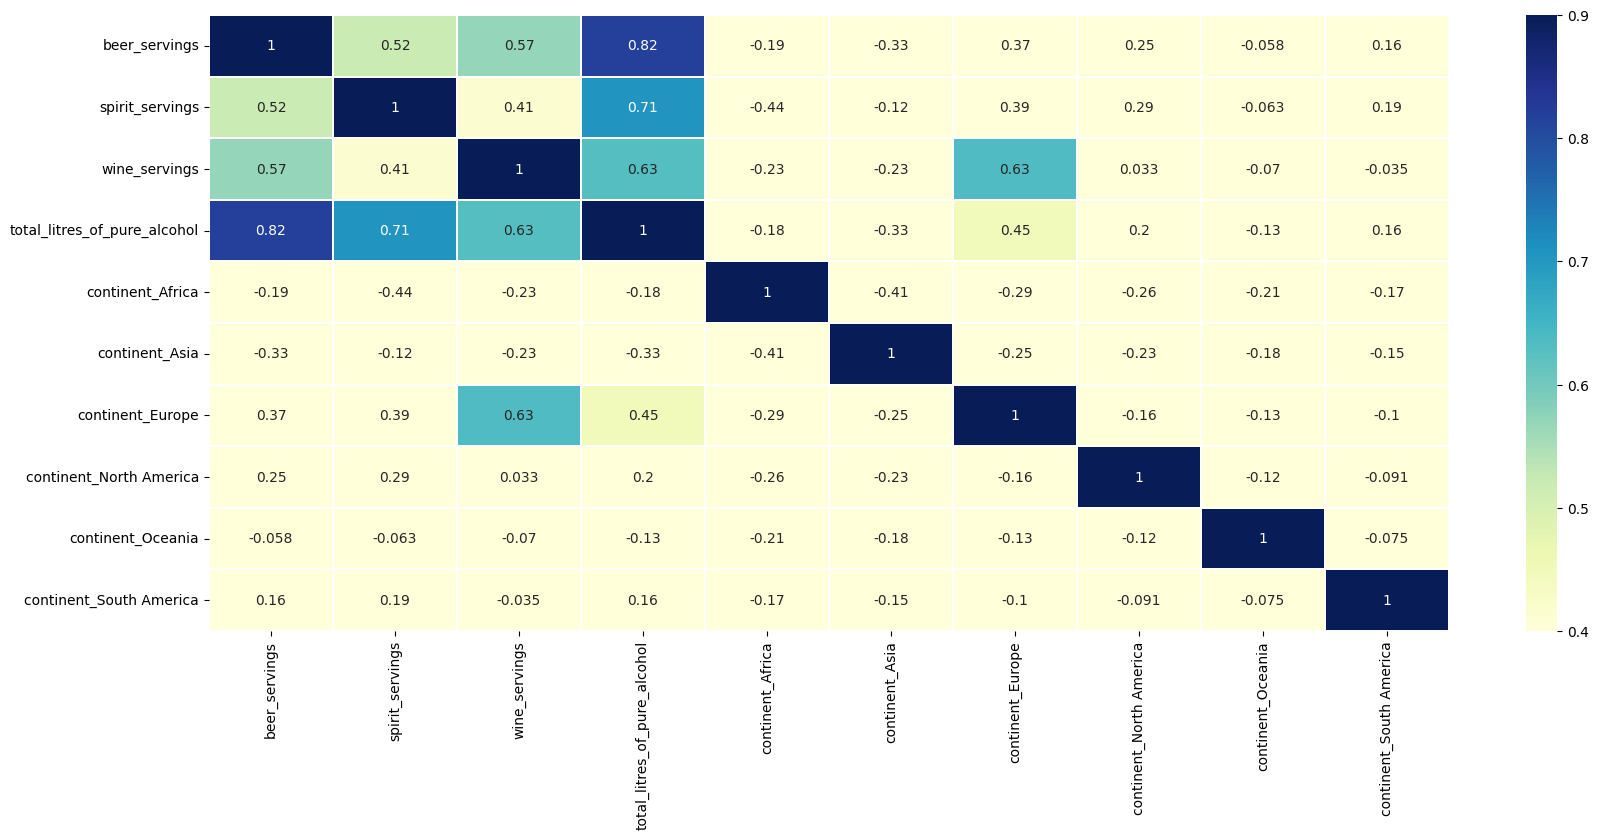

In [38]:
corrmatrix =data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [39]:
#data.columns
y=data['total_litres_of_pure_alcohol']
x=data.drop('total_litres_of_pure_alcohol', axis=1)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [41]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction =model.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error
print('MSE IS:',mean_squared_error(y_test,prediction))

MSE IS: 1.4107151984592203


In [43]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))

R squared value is : 0.8413520664385031


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
type(x)

pandas.core.frame.DataFrame

In [49]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x= standards.fit_transform(x)

In [50]:
x.describe()

AttributeError: ignored

In [51]:
x =pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,-4.249002e-17,3.289550e-17,-8.909197e-18,1.096517e-17,-1.178755e-16,4.111937e-17,1.096517e-17,6.579099e-17,3.563679e-17
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00
min,-9.445129e-01,-9.137362e-01,-6.199137e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
25%,-7.563577e-01,-8.757907e-01,-5.898190e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
50%,-3.500515e-01,-3.698512e-01,-4.092508e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
75%,4.407457e-01,6.135688e-01,-5.563805e-02,1.454436e+00,1.663563e+00,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
max,3.156725e+00,2.906107e+00,3.412777e+00,1.454436e+00,1.663563e+00,2.397916e+00,2.664583e+00,3.251373e+00,4.123106e+00


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS: 9.955758447853302
R squared value is : -0.1196168486129765


In [74]:
x=data.drop('total_litres_of_pure_alcohol', axis=1)
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.649015,0.476723,0.156553,0.031865,0.046742,0.012995,0.060086,0.007435,0.031994
std,0.325806,0.344284,0.197801,0.138976,0.190563,0.110713,0.180355,0.078627,0.141366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404696,0.149021,0.018669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.756611,0.499175,0.074594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940066,0.797634,0.226996,0.010918,0.004366,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
x =preprocessing.normalize(x)

In [57]:
x =pd .DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.648990,0.475226,0.143663,0.031865,0.046742,0.012995,0.000695,0.007435,0.000298
std,0.325793,0.343203,0.181514,0.138976,0.190563,0.110713,0.002087,0.078627,0.001315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404680,0.148553,0.017131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.756581,0.497608,0.068452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940029,0.795130,0.208306,0.010918,0.004366,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS: 9.955758447853302
R squared value is : -0.1196168486129765


<Axes: >

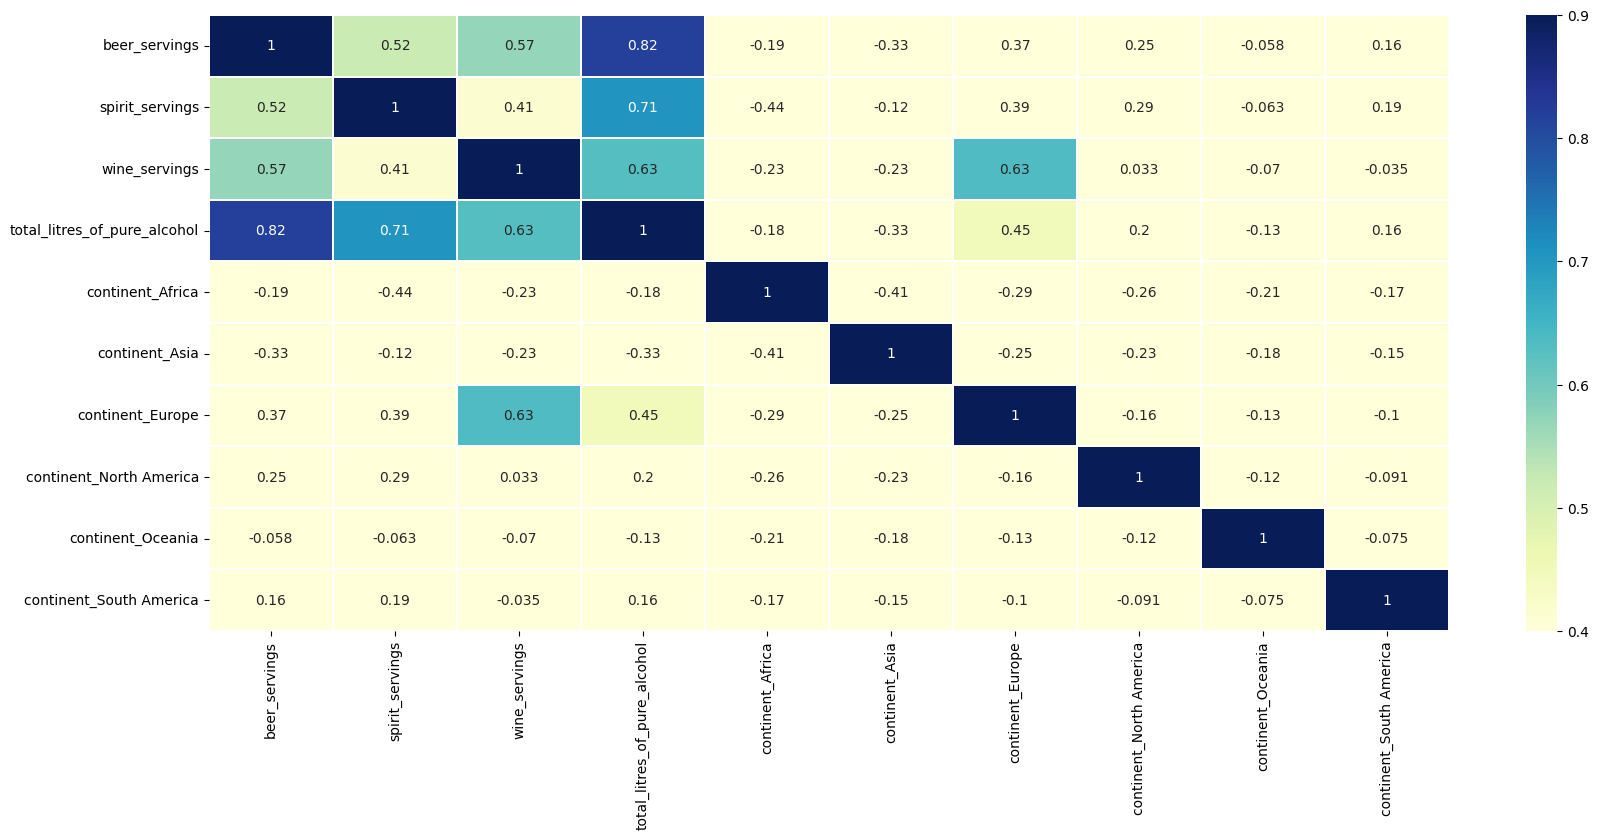

In [59]:
corrmatrix =data.corr()
plt.subplots(figsize =(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')


In [60]:
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS: 9.955758447853302
R squared value is : -0.1196168486129765


In [62]:
df1=pd.DataFrame({"Anu":[80,95,65,32,105],
                  "manju":[87,45,12,64,45],
                  "abcd":[36,44,56,91,50]},
                  index=[2009,2010,2011,2012,2013])

In [63]:
df2=pd.DataFrame({'Anu':[80,95,65,32,105],
                  'abc':[36,44,56,91,50],
                  'xyz':[87,45,12,64,45]},
                 index =[2005,2006,2007,2008,2009])

In [64]:
pd.merge(df1,df2,on ='Anu')

,Anu,manju,abcd,abc,xyz
0,80,87,36,36,87
1,95,45,44,44,45
2,65,12,56,56,12
3,32,64,91,91,64
4,105,45,50,50,45


In [65]:
df3=pd.DataFrame({"Anu":[80,95,65,32,105],
                  "def":[87,45,12,64,45],
                  "ghi":[36,44,56,91,50]})

In [66]:
df4=pd.DataFrame({"klm":[45,23,65,12,100],
                  "abc":[88,56,78,96,20],
                  "xyz":[12,56,78,95,111]})

In [67]:
join_data=df3.join(df4)

In [68]:
join_data

,Anu,def,ghi,klm,abc,xyz
0,80,87,36,45,88,12
1,95,45,44,23,56,56
2,65,12,56,65,78,78
3,32,64,91,12,96,95
4,105,45,50,100,20,111


In [69]:
df5=pd.DataFrame({"anu":[12,45,63,12,78],
                  "uvw":[65,13,45,78,65],
                  "qrs":[78,95,65,45,14]})

In [70]:
cancat_data = pd.concat([df4,df5],axis =1)

In [71]:
cancat_data

,klm,abc,xyz,anu,uvw,qrs
0,45,88,12,12,65,78
1,23,56,56,45,13,95
2,65,78,78,63,45,65
3,12,96,95,12,78,45
4,100,20,111,78,65,14
